<h2 style="color:blue" align="center">Potato Leaf Disease Detection using CNN and ANN</h2>

In this notebook we will classify diseased potato leafs using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [3]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 38.2/38.2 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 1.9 MB/s eta 0:00:00
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
     ------------------------------------- 420.6/420.6 KB 61.9 kB/s eta 0:00:00
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
     ---------------------------------------- 2.6/2.6 MB 93.0 kB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 851.2 kB/s eta 0:00:00
     ---------------------------------------- 5

  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Sanket\AppData\Local\Temp\pip-install-t6ad925d\tensorflow-gpu_a974a746d27d4a809234a27f4495171b\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: legacy-install-failure

Encountered error while trying to install package.

tensorflow-gpu

note: This is an issue with 

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Loading the Data

In [11]:
data = tf.keras.utils.image_dataset_from_directory('Leafdata')

Found 1200 files belonging to 3 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

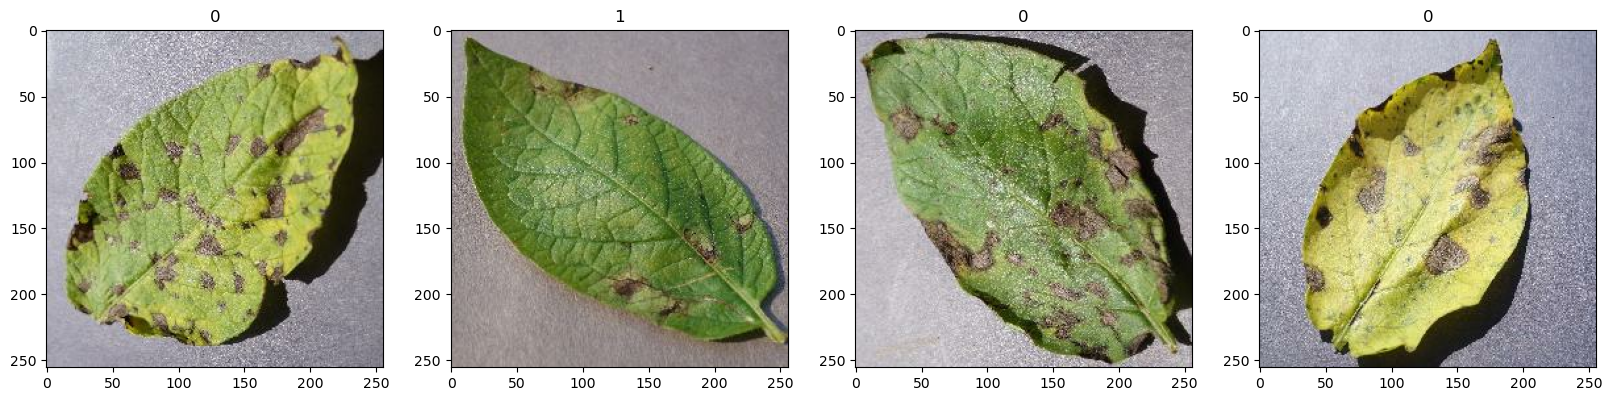

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scaling Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.49411765, 0.48235294, 0.50980395],
          [0.5882353 , 0.5764706 , 0.6039216 ],
          [0.5921569 , 0.5803922 , 0.60784316],
          ...,
          [0.74509805, 0.7372549 , 0.75686276],
          [0.6431373 , 0.63529414, 0.654902  ],
          [0.5803922 , 0.57254905, 0.5921569 ]],
 
         [[0.5137255 , 0.5019608 , 0.5294118 ],
          [0.58431375, 0.57254905, 0.6       ],
          [0.5803922 , 0.5686275 , 0.59607846],
          ...,
          [0.67058825, 0.6627451 , 0.68235296],
          [0.6117647 , 0.6039216 , 0.62352943],
          [0.54901963, 0.5411765 , 0.56078434]],
 
         [[0.5529412 , 0.5411765 , 0.5686275 ],
          [0.59607846, 0.58431375, 0.6117647 ],
          [0.58431375, 0.57254905, 0.6       ],
          ...,
          [0.54901963, 0.5411765 , 0.56078434],
          [0.56078434, 0.5529412 , 0.57254905],
          [0.6745098 , 0.6666667 , 0.6862745 ]],
 
         ...,
 
         [[0.7176471 , 0.7058824 , 0.7411765 ],
          [0.71372

## Spliting the data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

26

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Building deep learning model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Training the model

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
26/26 [==============================] - 34s 1s/step - loss: -1.6871 - accuracy: 0.3413 - val_loss: -4.3569 - val_accuracy: 0.3795
Epoch 2/20
26/26 [==============================] - 26s 998ms/step - loss: -43.9126 - accuracy: 0.3726 - val_loss: -209.1646 - val_accuracy: 0.3527
Epoch 3/20
26/26 [==============================] - 26s 1s/step - loss: -814.5671 - accuracy: 0.3786 - val_loss: -2542.7717 - val_accuracy: 0.3884
Epoch 4/20
26/26 [==============================] - 27s 1s/step - loss: -8369.6904 - accuracy: 0.3822 - val_loss: -22989.1602 - val_accuracy: 0.3839
Epoch 5/20
26/26 [==============================] - 27s 1s/step - loss: -55432.1914 - accuracy: 0.3774 - val_loss: -115486.3203 - val_accuracy: 0.3705
Epoch 6/20
26/26 [==============================] - 26s 986ms/step - loss: -290406.4688 - accuracy: 0.3678 - val_loss: -738711.9375 - val_accuracy: 0.4107
Epoch 7/20
26/26 [==============================] - 26s 988ms/step - loss: -1332872.7500 - accuracy: 0.4062 